In [2]:
from __future__ import print_function
import struct
import numpy as np
import math
import sys
import ROOT
import array
import matplotlib.pyplot as plt

import matplotlib.pylab as pltt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse,Arrow
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

import matplotlib
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 36}
matplotlib.rc('font', **font)
import matplotlib.font_manager as font_manager


Welcome to JupyROOT 6.24/06


In [3]:

elements={"h": 1, "he": 2, "li": 3, "be": 4, "b": 5, "c": 6, "n": 7, "o": 8, "f": 9, "ne": 10, "na": 11, "mg": 12, "al": 13, 
"si": 14, "p": 15, "s": 16, "cl": 17, "ar": 18, "k": 19, "ca": 20, "sc": 21, "ti": 22, "v": 23, "cr": 24, "mn": 25, "fe": 26,
 "co": 27, "ni": 28, "cu": 29, "zn": 30, "ga": 31, "ge": 32, "as": 33, "se": 34, "br": 35, "kr": 36, "rb": 37, "sr": 38, "y": 39,
  "zr": 40, "nb": 41, "mo": 42, "tc": 43, "ru": 44, "rh": 45, "pd": 46, "ag": 47, "cd": 48, "in": 49, "sn": 50, "sb": 51, "te": 52,
   "i": 53, "xe": 54, "cs": 55, "ba": 56, "la": 57, "ce": 58, "pr": 59, "nd": 60, "pm": 61, "sm": 62, "eu": 63, "gd": 64, "tb": 65,
    "dy": 66, "ho": 67, "er": 68, "tm": 69, "yb": 70, "lu": 71, "hf": 72, "ta": 73, "w": 74, "re": 75, "os": 76, "ir": 77, "pt": 78,
     "au": 79, "hg": 80, "tl": 81, "pb": 82, "bi": 83, "po": 84, "at": 85, "rn": 86, "fr": 87, "ra": 88, "ac": 89, "th": 90, "pa": 91,
      "u": 92, "np": 93, "pu": 94, "am": 95, "cm": 96, "bk": 97, "cf": 98, "es": 99, "fm": 100, "md": 101, "no": 102, "lr": 103, "rf": 104,
       "db": 105, "sg": 106, "bh": 107, "hs": 108, "mt": 109, "ds": 110, "rg": 111, "cn": 112, "nh": 113, "fl": 114, "mc": 115, "lv": 116, "ts": 117, "og": 118,
	   "119": 119,"120": 120,"121": 121,"122": 122,"123": 123,"124": 124,"125": 125,"126": 126,"127": 127,"128": 128,"129": 129,"130": 130,
	   "131": 131,"132": 132,"133": 133,"134": 134,"135": 135,"136": 136}

Zele = []
Zele.append("n")
for key in elements:
	Zele.append(key)

def getnamebyz(z):
	"""
	Get element name by atomic number Z
	
	Parameters:
	   z ( int ): Atomic number Z
	"""
	return Zele[z]

def getZ(input):
	"""
	Get atomic number Z by element name
	
	Parameters:
	   input ( str ): Element name
	"""
	if (input==""):
		return -8888
	else:
		sep=re.split('(\d+)',input)
		if len(sep)==1:
			if sep[0]=="n":
				return int(0)
			elif (sep[0]=="p" or sep[0]=="d" or sep[0]=="t"):
				return int(1)			
			else:
				print("Something wrong! ",input)
		else:
			return int(elements[sep[0]])

def getA(input):
	"""
	Get mass number A by element name
	
	Parameters:
	   input ( str ): Element name
	"""
	if (input==""):
		return -9999
	else:
		sep=re.split('(\d+)',input)
		if len(sep)==1:
			if sep[0]=="n":
				return 1
			elif sep[0]=="p":
				return 1
			elif sep[0]=="d":
				return 2
			elif sep[0]=="t":
				return 3
			else:
				print("Something wrong! ",input)
		else:
			return int(sep[1])

def drawbox(N,Z,fcolor='None',ecolor='gray', falpha = 1,zorder=-1):
    if (zorder>0):
        rec = plt.Rectangle((N-0.5,Z-0.5),1,1,facecolor=fcolor,edgecolor=ecolor,alpha = falpha,zorder=zorder)
    else:
        rec = plt.Rectangle((N-0.5,Z-0.5),1,1,facecolor=fcolor,edgecolor=ecolor,alpha = falpha)
    #plt.text(N-0.4,Z-0.1,'$\mathregular{^{'+str(Z+N)+'}'+elements[Z]+'}$')
    return rec 


def drawarea(Aele,fcolor='None',iswithtext=True):
	recs = []
	for i in Aele:
		for j in range(i[1]-elements[i[0].lower()],i[2]-elements[i[0].lower()]+1):
			recs.append(drawbox(j,elements[i[0].lower()],fcolor))
	return recs


In [4]:
import re
Zlim = [9.5,116]
Nlim = [9.5,200]
def plot_base(axis,eletag=True):
	magic_num = [2, 8, 20, 28, 50, 82, 126]
	for i in magic_num:
		axis.axhline(y=i+0.5,color='b',linestyle='--',linewidth=0.2)
		axis.axhline(y=i-0.5,color='b',linestyle='--',linewidth=0.2)
		axis.axvline(x=i+0.5,color='b',linestyle='--',linewidth=0.2)
		axis.axvline(x=i-0.5,color='b',linestyle='--',linewidth=0.2)

	nubase_stable = np.load("nubase/nubase_stable.npy",allow_pickle='TRUE')
	for i in range(len(nubase_stable)):
		axis.add_patch(drawbox(nubase_stable[i]["N"],nubase_stable[i]["Z"],fcolor='k',ecolor='None',falpha = 1))
	axis.set_xlabel('Neutron number, $N$')
	axis.set_ylabel('Proton number, $Z$')
	axis.set_xlim(Nlim)
	axis.set_ylim(Zlim)
	if(eletag):    
		for i in range(int(Zlim[0]+0.5),int(Zlim[1]+0.5)):
			text = axis.text(Nlim[1]-1.5, i, getnamebyz(i).capitalize(),ha="center", va="center", color="k",fontweight='bold',fontsize='medium',family = ['Times New Roman'])
	axis.set_xticks(np.arange(Nlim[0]+0.5,Nlim[1]-0.5,2))
	axis.set_xticklabels([('%.0f'%i) for i in np.arange(Nlim[0]+0.5,Nlim[1]-0.5,2)])
	axis.set_yticks(np.arange(Zlim[0]+0.5,Zlim[1]-0.5,2))
	axis.set_yticklabels([('%.0f'%i) for i in np.arange(Zlim[0]+0.5,Zlim[1]-0.5,2)])    
def plot_magic(axis,color='y',linewidth=1):
	magic_num = [2, 8, 20, 28, 50, 82, 126]
	for i in magic_num:
		axis.axhline(y=i+0.5,color=color,linestyle='--',linewidth=linewidth)
		axis.axhline(y=i-0.5,color=color,linestyle='--',linewidth=linewidth)
		axis.axvline(x=i+0.5,color=color,linestyle='--',linewidth=linewidth)
		axis.axvline(x=i-0.5,color=color,linestyle='--',linewidth=linewidth)
#     axis.text(riname, i, getnamebyz(i).capitalize(),ha="center", va="center", color="k",fontweight='normal',fontsize='medium',family = ['Times New Roman'])

In [10]:
nubase_bminus = np.load("nubase/nubase_bminus.npy",allow_pickle='TRUE')
ame = np.load("ame/all_ame20.npy",allow_pickle='TRUE')
hfb32 = np.load("models/data_hfb32.npy",allow_pickle='TRUE')
ktuy05 = np.load("models/data_ktuy05.npy",allow_pickle='TRUE')
rchb18 = np.load("models/data_rchb18.npy",allow_pickle='TRUE')
ws4rbf = np.load("models/data_WS4RBF.npy",allow_pickle='TRUE')
dz10 = np.load("models/data_dz10.npy",allow_pickle='TRUE')
frdm12 = np.load("models/data_frdm12.npy",allow_pickle='TRUE')
frdm95 = np.load("models/data_frdm95.npy",allow_pickle='TRUE')

theo = []
# theo.append({"name":"FRDM2012","data":frdm12})
# theo.append({"name":"FRDM1995","data":frdm95})
theo.append({"name":"FRDM","data":frdm12})
# theo.append({"name":"HFB-32 (2016)","data":hfb32})
# theo.append({"name":"KTUY2005","data":ktuy05})
# theo.append({"name":"RCHB+PCPK1 (2018)","data":rchb18})
# theo.append({"name":"WS4+RBF (2015)","data":ws4rbf})
# theo.append({"name":"DuZu","data":dz10})

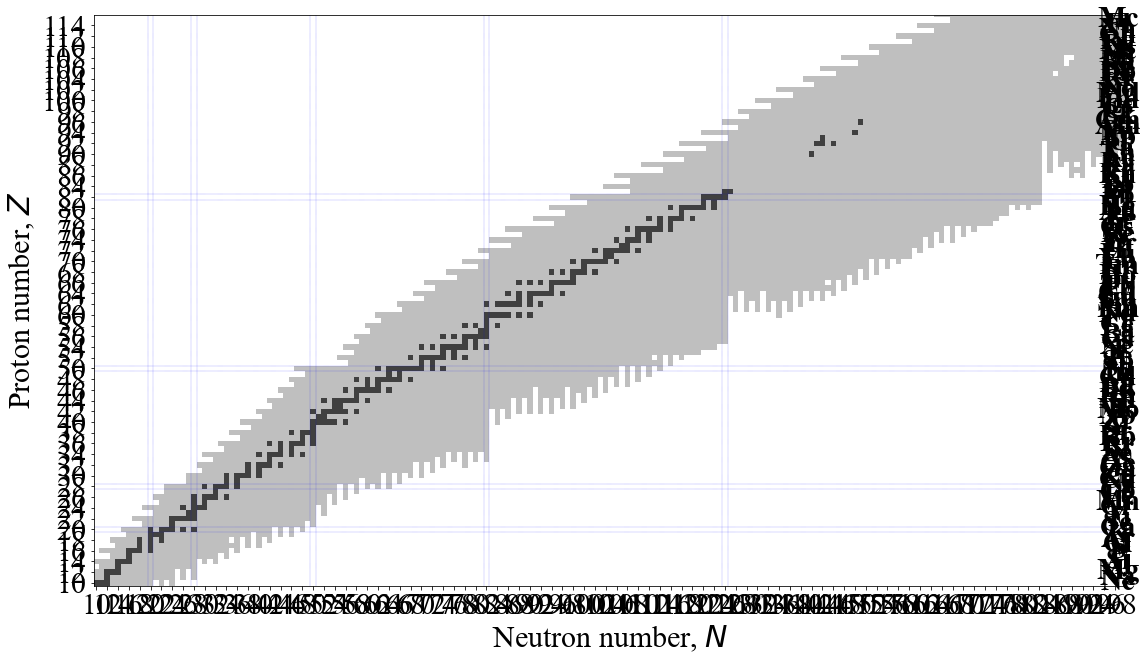

In [10]:
fig,axis = plt.subplots()
fig.set_size_inches(18.5,10.5)
fig.subplots_adjust(hspace=0,wspace=0)
plot_base(axis)
for i in range(len(frdm12)):
    if (frdm12[i]["isbound"]):
        plt.gca().add_patch(drawbox(frdm12[i]["N"],frdm12[i]["Z"],fcolor='gray',ecolor='None',falpha = 0.5))


### Plot systematic for certain nuclei

In [5]:
def plotsys(Z,Nrange):
    #ame
    ame_exp = []
    ame_exp_err = []
    NN_ame_exp = []
    ame_extr = []
    ame_extr_err = []
    NN_ame_extr = []
    for idx,i in enumerate(theo[0]["data"]):
        if (i["Z"]==Z and i["N"]<=Nrange[1] and i["N"]>=Nrange[0]):
            entry = next((item for item in ame if (item["Z"] == i["Z"] and item["N"] == i["N"])), None)
            if (entry!=None):
                #AME exp
                if (entry["is_ex_M"]==1):
                    ame_exp.append(entry["M"]/1000.-i["mass"])
#                     print(i["N"],i["mass"],entry["M"]/1000.)
                    ame_exp_err.append(entry["DM"]/1000.)
                    NN_ame_exp.append(i["N"])
                #AME extr
                else:
                    ame_extr.append(entry["M"]/1000.-i["mass"])
                    ame_extr_err.append(entry["DM"]/1000.)
                    NN_ame_extr.append(i["N"])
#     print(NN_ame_exp,ame_exp,ame_exp_err)
#     print(NN_ame_extr,ame_extr,ame_extr_err)
    dataset = []
    NN = []
    for idx,i in enumerate(theo[0]["data"]):
        if (i["Z"]==Z and i["N"]<=Nrange[1] and i["N"]>=Nrange[0]):
            datum = []
            #FRDM
            datum.append(0.)
            #Others
            for j in range(1,len(theo)):
                entry = next((item for item in theo[j]["data"] if (item["Z"] == i["Z"] and item["N"] == i["N"])), None)
                datum.append(entry["mass"]-i["mass"])
            dataset.append(datum)
            NN.append(i["N"])
    dataset = np.asarray(dataset)
    dataset = dataset.transpose()
#     print(dataset)
    fig,axis = plt.subplots()
    fig.set_size_inches(18.5,10.5)
    fig.subplots_adjust(hspace=0,wspace=0)
    for j in range(len(theo)):
        if (j==0):
            axis.plot(NN,dataset[j],'--',color='grey',label=theo[j]['name'])
        else:
            axis.plot(NN,dataset[j],label=theo[j]['name'],lw=3)
    axis.errorbar(NN_ame_exp,ame_exp,yerr=ame_exp_err,fmt='o',markerfacecolor='k',markeredgecolor='k',markersize=12,color='k',label='AME2020 exp.')
    axis.errorbar(NN_ame_extr,ame_extr,yerr=ame_extr_err,fmt='o',markerfacecolor='None',markeredgecolor='k',markersize=12,color='k',label='AME2020 extr.')
    legfont = font_manager.FontProperties(family='Times New Roman',
                                   weight='normal',
                                   style='normal', size=26)
    axis.legend(ncol=3,loc = 'lower left',prop=legfont)
    
    axis.set_xlabel("Neutron number N")
    axis.set_ylabel(r"$M_{i}-M_{FRDM2012}$ (MeV)")
    return axis


In [6]:
def plotsysS2n(axis,Z,Nrange,offset = 0.,drawleg = True,mycolor='b'):
    #ame
    ame_exp = []
    ame_exp_err = []
    NN_ame_exp = []
    ame_extr = []
    ame_extr_err = []
    NN_ame_extr = []
    for idx,i in enumerate(theo[0]["data"]):
        if (i["Z"]==Z and i["N"]+i["Z"]<=Nrange[1] and i["N"]+i["Z"]>=Nrange[0]):
            entry = next((item for item in ame if (item["Z"] == i["Z"] and item["N"] == i["N"])), None)
            if (entry!=None):
                #AME exp
                if (entry["is_ex_M"]==1):
                    ame_exp.append(entry["S2n"]/1000)
#                     print(i["N"],i["mass"],entry["M"]/1000.)
                    ame_exp_err.append(entry["D_S2n"]/1000.)
                    NN_ame_exp.append(i["N"]+i["Z"])
#                     NN_ame_exp.append(i["N"])
                #AME extr
                else:
                    ame_extr.append(entry["S2n"]/1000.)
                    ame_extr_err.append(entry["D_S2n"]/1000.)
#                     NN_ame_extr.append(i["N"])
                    NN_ame_extr.append(i["N"]+i["Z"])
#     print(NN_ame_exp,ame_exp,ame_exp_err)
#     print(NN_ame_extr,ame_extr,ame_extr_err)
    dataset = []
    NN = []
    for idx,i in enumerate(theo[0]["data"]):
        if (i["Z"]==Z and i["N"]+i["Z"]<=Nrange[1] and i["N"]+i["Z"]>=Nrange[0]):
            datum = []
            for j in range(len(theo)):
                entry = next((item for item in theo[j]["data"] if (item["Z"] == i["Z"] and item["N"] == i["N"])), None)
                datum.append(entry["S2n"])
            dataset.append(datum)
            NN.append(i["N"]+i["Z"])
#             NN.append(i["N"])
    dataset = np.asarray(dataset)
    dataset = dataset.transpose()
#     print(dataset)
    colors = ['b','g','r','c','m','y','k']
    my_ls = ['-','--']
    for j in range(len(theo)):
#         axis.plot(NN,[k+offset for k in dataset[j]],ls = my_ls, color = colors[j],lw=4,label=theo[j]['name'])
        axis.plot(NN,[k+offset for k in dataset[j]], color = mycolor,ls = my_ls[j],lw=4,label=theo[j]['name'])
    axis.errorbar(NN_ame_exp,[k+offset for k in ame_exp],yerr=ame_exp_err,fmt='o-',markeredgewidth=4, linewidth=4,elinewidth=4,capsize=18, markerfacecolor='None',markeredgecolor='k',markersize=20,color='k',label='AME2020 exp.')
#     axis.errorbar(NN_ame_extr,[k+offset for k in ame_extr],yerr=ame_extr_err,fmt='o',markerfacecolor='None',markeredgecolor='k',markersize=12,color='k',label='AME2020 extr.')
#     print(ame_exp,ame_exp_err)
#     axis.text(NN_ame_exp[0], ame_exp[0]+offset-1.5,str(NN_ame_exp[0]+Z),ha="center", va="center", color="b",fontweight='bold',fontsize=30,family = ['Times New Roman'])

    legfont = font_manager.FontProperties(family='Times New Roman',
                                   weight='normal',
                                   style='normal', size=20)
    if (drawleg):
        axis.legend(ncol=2,loc = 'upper right',bbox_to_anchor=(1.07, 1.),prop=legfont)
#     axis.legend(ncol=3,loc = 'lower left',prop=legfont)
    axis.set_xlabel("Mass number N")
    axis.set_ylabel(r"$S_{2n}$ (MeV)")
    return axis


In [7]:
def printmass(Z,Nrange):
    for j in range(len(theo)):
        for idx,i in enumerate(theo[j]["data"]):
            if (i["Z"]==Z and i["N"]<=Nrange[1] and i["N"]>=Nrange[0]):
                if (j==0):
                    entry = next((item for item in ame if (item["Z"] == i["Z"] and item["N"] == i["N"])), None)
                    if (entry!=None):
                        #AME exp
                        if (entry["is_ex_M"]==1):
                            print(str(i["Z"]+i["N"])+getnamebyz(i["Z"]).capitalize(),"AME exp Mass=",entry["M"]/1000.," +/- ",entry["DM"]/1000.,"MeV")
                        #AME extr
                        else:
                            print(str(i["Z"]+i["N"])+getnamebyz(i["Z"]).capitalize(),"AME extr Mass=",entry["M"]/1000.," +/- ",entry["DM"]/1000.,"MeV")
                print(str(i["Z"]+i["N"])+getnamebyz(i["Z"]).capitalize(),theo[j]['name']," Mass= ",i["mass"],"MeV")


In [8]:
printmass(49,[84,86])

133In AME exp Mass= -57.678  +/-  0.041 MeV
133In FRDM  Mass=  -59.03 MeV
134In AME exp Mass= -51.855  +/-  0.044 MeV
134In FRDM  Mass=  -52.73 MeV
135In AME extr Mass= -47.11  +/-  0.3 MeV
135In FRDM  Mass=  -47.92 MeV


(3.0, 20.0)

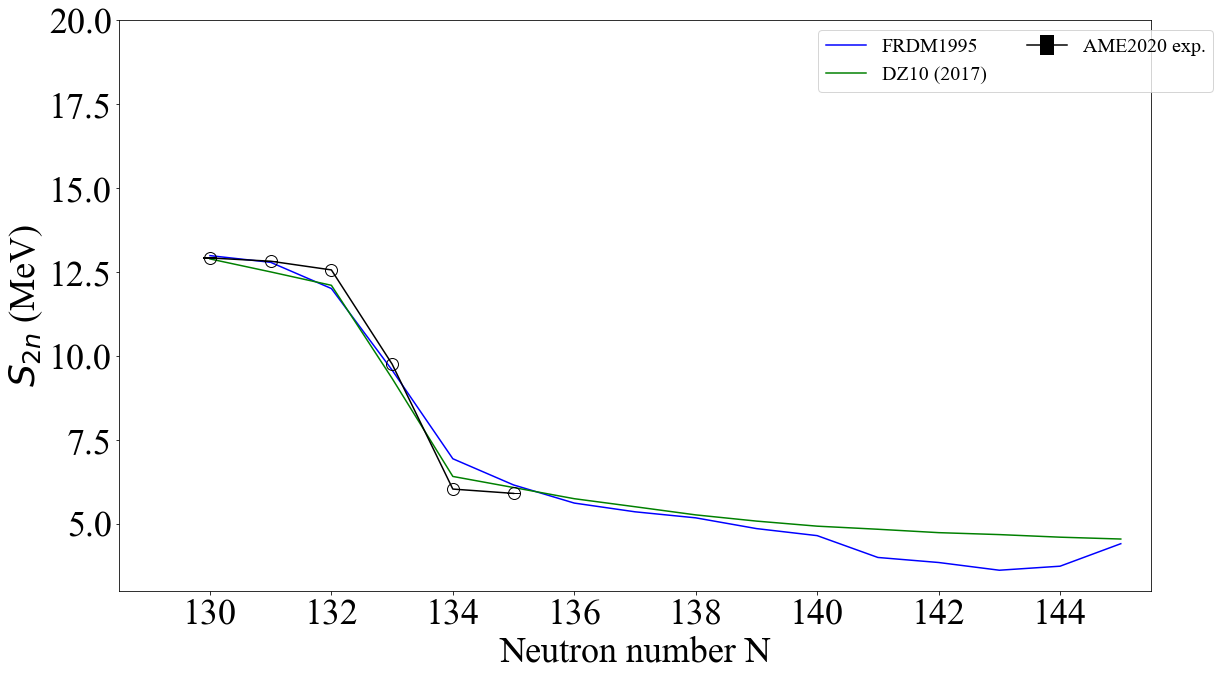

In [288]:
fig,axis = plt.subplots()
fig.set_size_inches(18.5,10.5)
fig.subplots_adjust(hspace=0,wspace=0)
# axis = plotsysS2n(axis,48,[130,150],0,True)
# axis = plotsysS2n(axis,49,[130,150],0,False)
axis = plotsysS2n(axis,50,[130,145],0,True)
# axis = plotsysS2n(axis,51,[130,145],0,False)
# axis = plotsysS2n(axis,52,[130,145],0,False)
# axis = plotsysS2n(axis,53,[130,145],0.,False)
# axis = plotsysS2n(axis,52,[80,95],0.,False)
# axis = plotsysS2n(axis,53,[80,95],0.,False)
# axis = plotsysS2n(axis,54,[80,95],0.,False)
# axis = plotsysS2n(axis,49,[80,95],0.,False)
# axis = plotsysS2n(axis,48,[80,95],0.,False)
axis.set_xlim([128.5,145.5])
axis.set_ylim([3,20])
# axis.set_xticks(np.arange(80,95,1));
# axis.set_xticklabels(np.arange(80,92,1));    


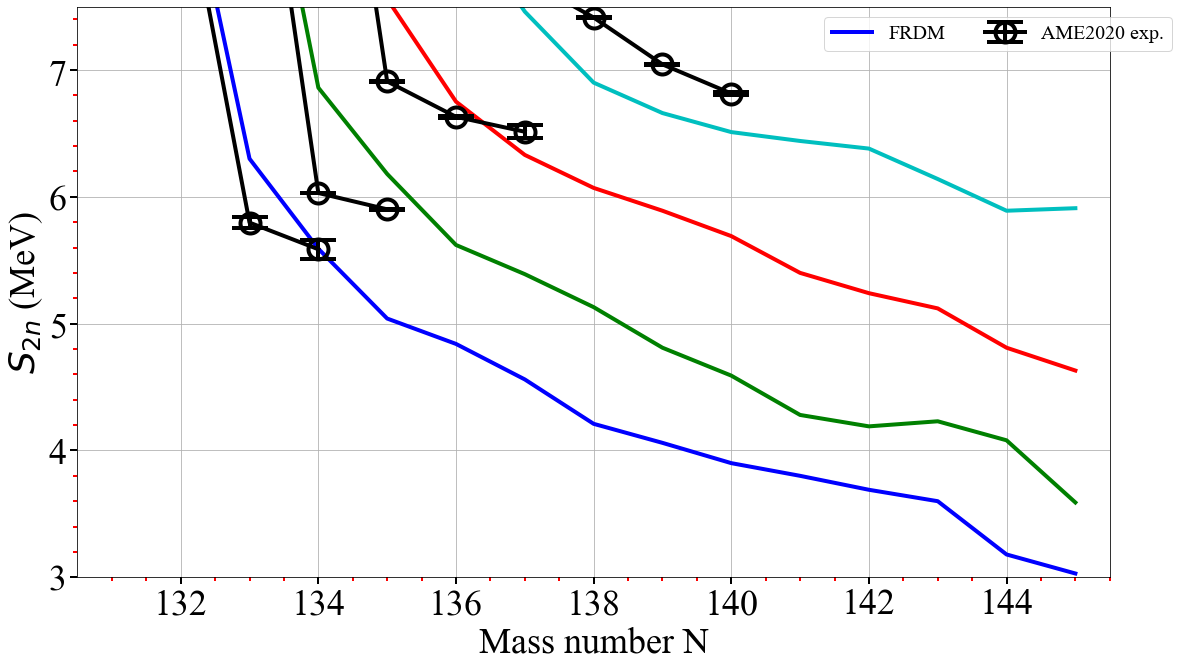

In [11]:
fig,axis = plt.subplots()
fig.set_size_inches(18.5,10.5)
fig.subplots_adjust(hspace=0,wspace=0)
# axis = plotsysS2n(axis,48,[130,150],0,True)
axis = plotsysS2n(axis,49,[130,145],0,True,'b')
axis = plotsysS2n(axis,50,[130,145],0,False,'g')
axis = plotsysS2n(axis,51,[130,145],0,False,'r')
axis = plotsysS2n(axis,52,[130,145],0,False,'c')
# axis = plotsysS2n(axis,53,[130,145],0,False)
# axis = plotsysS2n(axis,53,[130,145],0.,False)
# axis = plotsysS2n(axis,52,[80,95],0.,False)
# axis = plotsysS2n(axis,53,[80,95],0.,False)
# axis = plotsysS2n(axis,54,[80,95],0.,False)
# axis = plotsysS2n(axis,49,[80,95],0.,False)
# axis = plotsysS2n(axis,48,[80,95],0.,False)
axis.set_xlim([130.5,145.5])
axis.set_ylim([3.,7.5])
axis.yaxis.set_minor_locator(AutoMinorLocator())
axis.xaxis.set_minor_locator(AutoMinorLocator())
axis.tick_params(which='both', width=2)
axis.tick_params(which='major', length=7)
axis.tick_params(which='minor', length=4, color='r')
axis.grid('y')
# axis.set_xticks(np.arange(80,95,1));
# axis.set_xticklabels(np.arange(80,92,1));    


(130.5, 150.5)

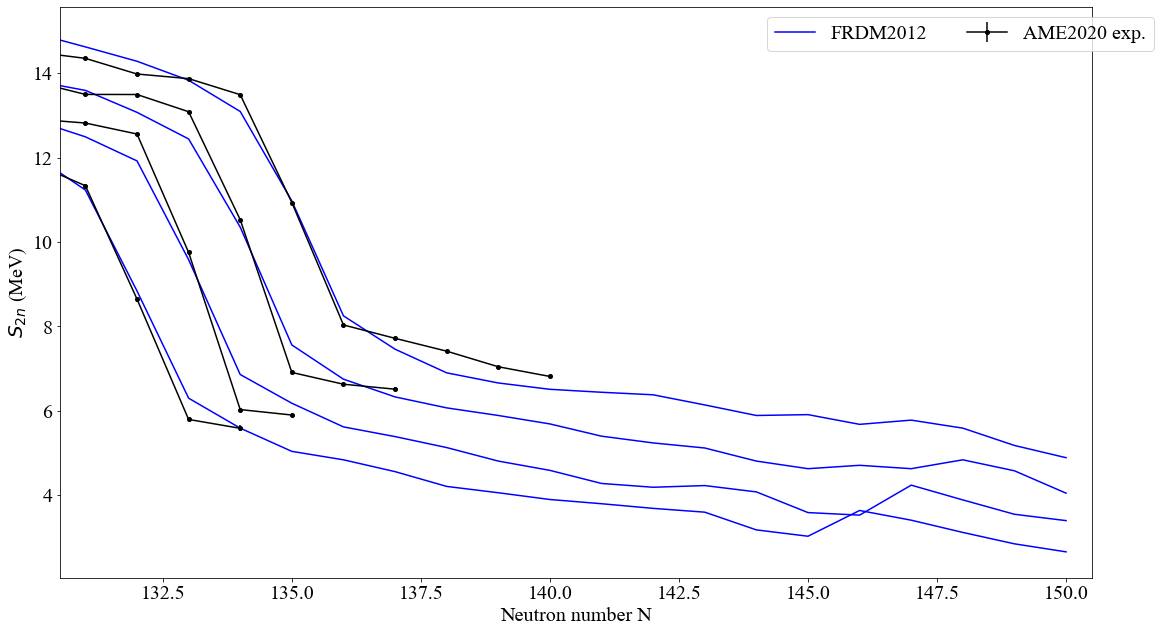

In [56]:
fig,axis = plt.subplots()
fig.set_size_inches(18.5,10.5)
fig.subplots_adjust(hspace=0,wspace=0)
# axis = plotsysS2n(axis,49,[80,95],0,True)
axis = plotsysS2n(axis,49,[130,150],0,True)
axis = plotsysS2n(axis,50,[130,150],0,False)
axis = plotsysS2n(axis,51,[130,150],0,False)
axis = plotsysS2n(axis,52,[130,150],0,False)
# axis = plotsysS2n(axis,51,[80,95],0.,False)
# axis = plotsysS2n(axis,52,[80,95],0.,False)
# axis = plotsysS2n(axis,53,[80,95],0.,False)
# axis = plotsysS2n(axis,54,[80,95],0.,False)
# axis = plotsysS2n(axis,49,[80,95],0.,False)
# axis = plotsysS2n(axis,48,[80,95],0.,False)
axis.set_xlim([130.5,150.5])
# axis.set_xticks(np.arange(80,95,1));
# axis.set_xticklabels(np.arange(80,92,1));    


(130.5, 150.5)

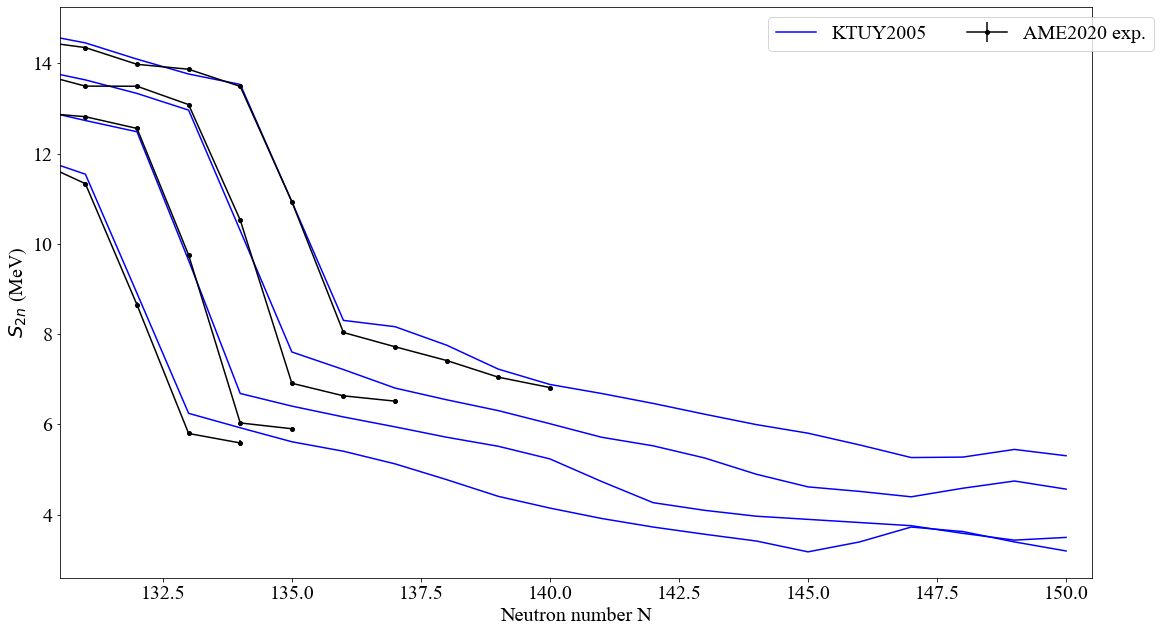

In [58]:
fig,axis = plt.subplots()
fig.set_size_inches(18.5,10.5)
fig.subplots_adjust(hspace=0,wspace=0)
# axis = plotsysS2n(axis,49,[80,95],0,True)
axis = plotsysS2n(axis,49,[130,150],0,True)
axis = plotsysS2n(axis,50,[130,150],0,False)
axis = plotsysS2n(axis,51,[130,150],0,False)
axis = plotsysS2n(axis,52,[130,150],0,False)
# axis = plotsysS2n(axis,51,[80,95],0.,False)
# axis = plotsysS2n(axis,52,[80,95],0.,False)
# axis = plotsysS2n(axis,53,[80,95],0.,False)
# axis = plotsysS2n(axis,54,[80,95],0.,False)
# axis = plotsysS2n(axis,49,[80,95],0.,False)
# axis = plotsysS2n(axis,48,[80,95],0.,False)
axis.set_xlim([130.5,150.5])
# axis.set_xticks(np.arange(80,95,1));
# axis.set_xticklabels(np.arange(80,92,1));    


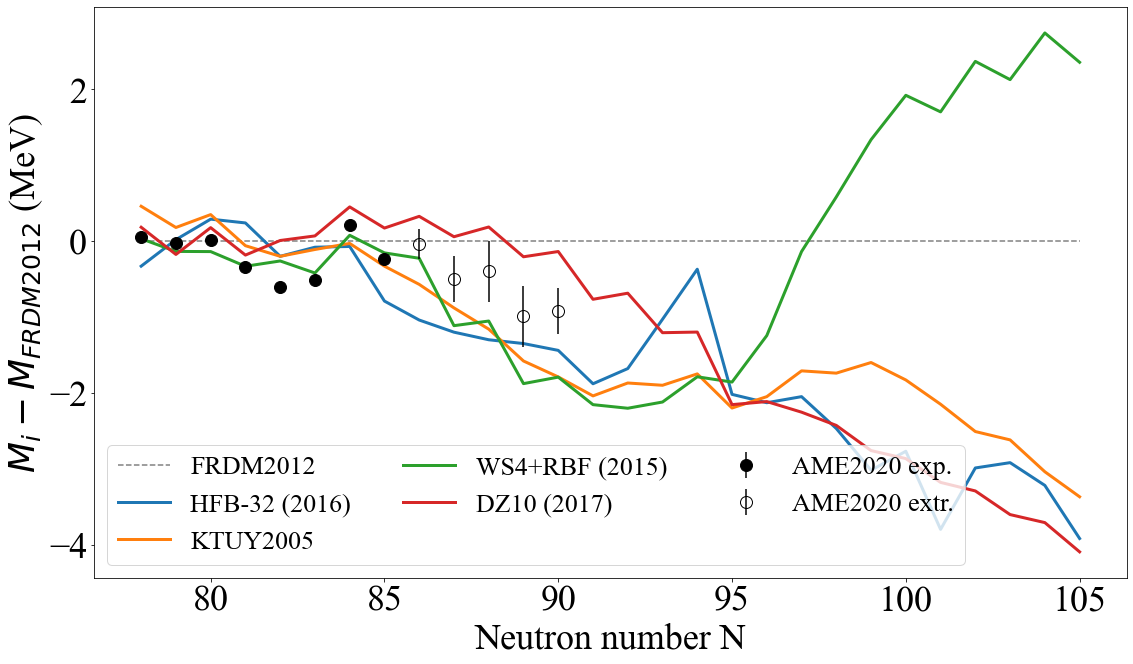

In [63]:
axis = plotsys(50,[78,105])

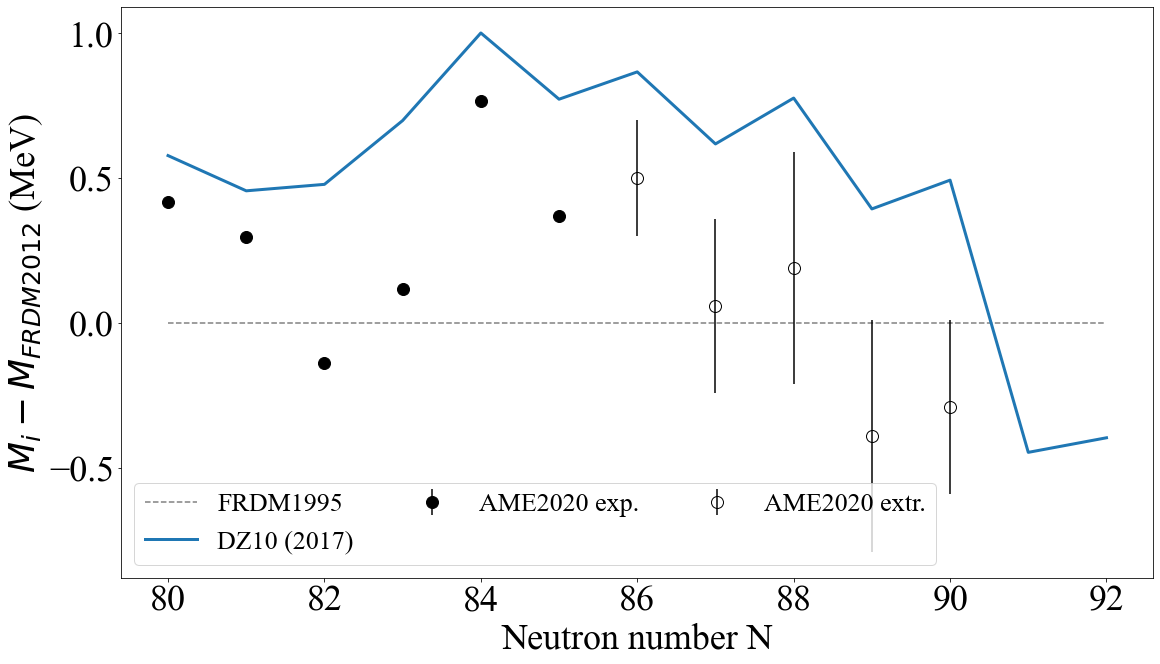

In [133]:
axis = plotsys(50,[80,92])

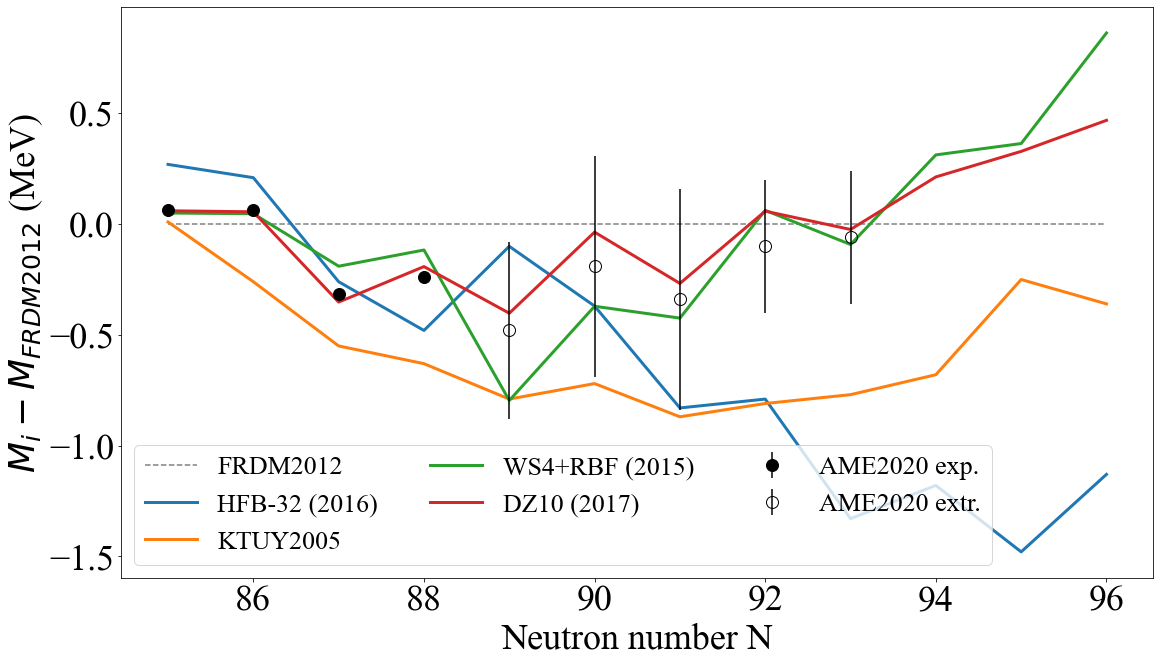

In [66]:
axis = plotsys(52,[85,96])

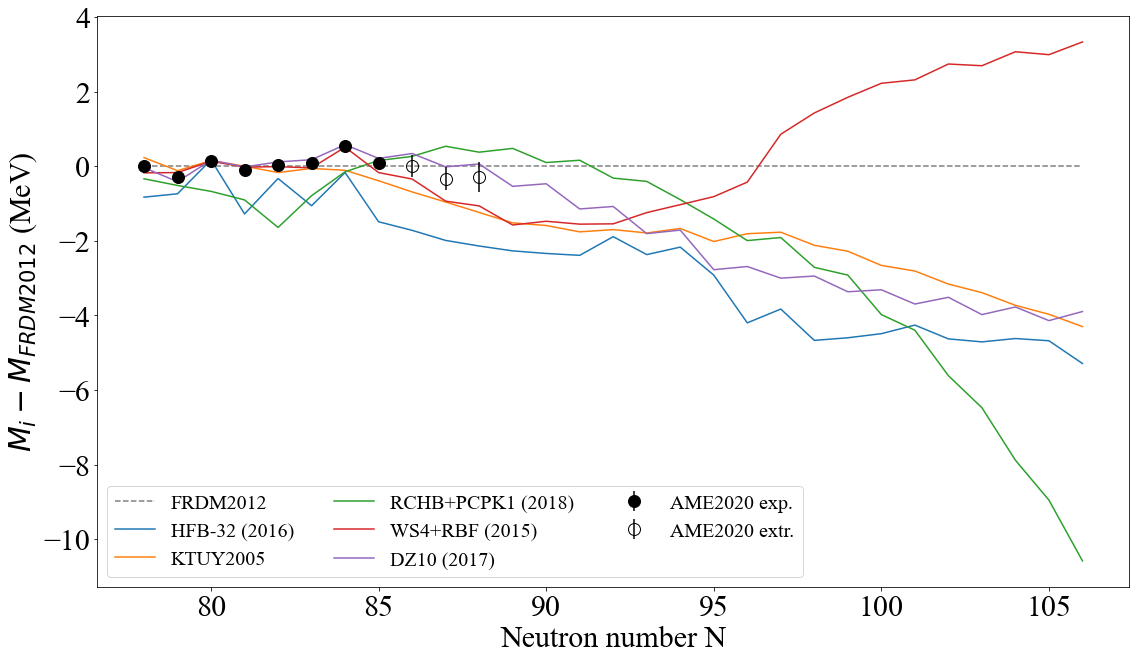

In [157]:
axis = plotsys(49,[78,106])

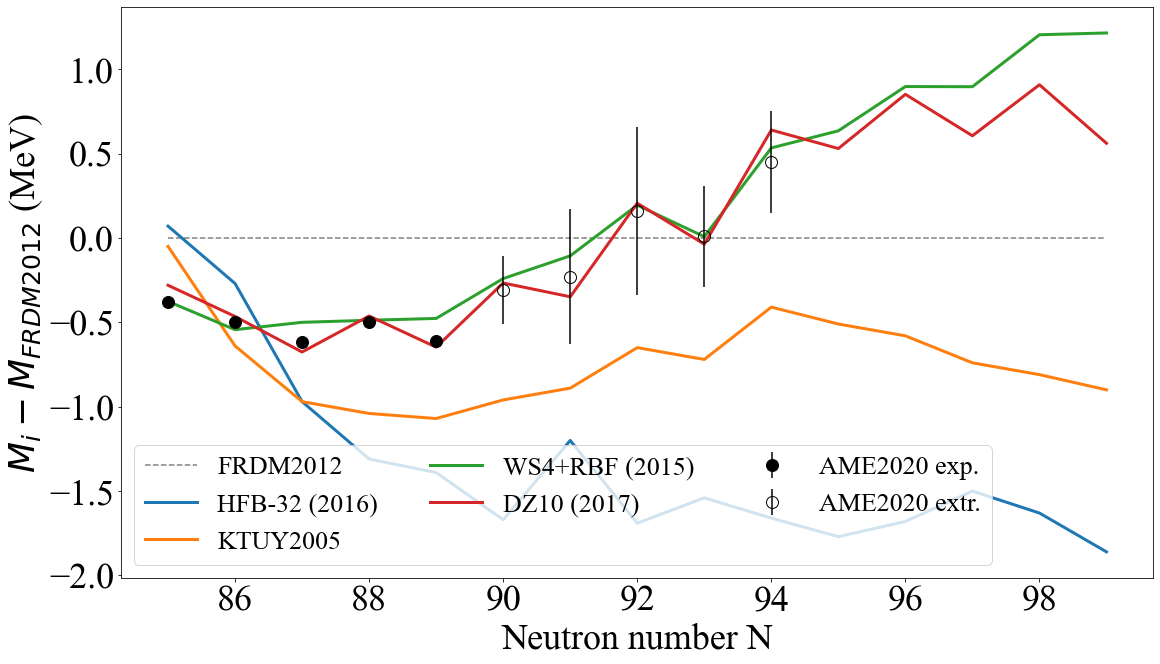

In [11]:
axis = plotsys(53,[85,99])

In [229]:
def plot_tag(axis,riname,offset = 0.1):
    temp = re.findall(r'\d+', riname)
    res = list(map(int, temp))[0]
    ele = ""
    if (riname[0].isdigit()):
        ele = riname[len(str(res)):]
    else:
        ele = riname[:len(riname)-len(str(res))]
    text = axis.text(res-elements[ele.lower()], elements[ele.lower()]+offset, r'$\mathrm{^{'+str(res)+"}}$"+ele.capitalize(),ha="center", va="center", color="k",fontweight='bold',fontsize=17,family = ['Times New Roman'])

def plot_tag_NZ(axis,N,Z,offset=0.1,cc='k'):
    ele = getnamebyz(Z)
    res = N+Z
    text = axis.text(res-elements[ele.lower()], elements[ele.lower()]+offset, r'$\mathrm{^{'+str(res)+"}}$"+ele.capitalize(),ha="center", va="center", color=cc,fontweight='bold',fontsize=17,family = ['Times New Roman'])


In [138]:
def get_lise_yields(infile):
    file1 = open(infile);
    count = 0
    yields = []
    while True:
        count+=1
        line1 = file1.readline()
        if (not line1):
            break
        if (line1[0]=="!"):
            continue
        
        line1 = line1[0:len(line1)-1]
        line1 = line1.split()
        yields.append({"N":int(line1[0]),"Z":int(line1[1]),"A":int(line1[0])+int(line1[1]),"yield":float(line1[2])})
    return yields
lise_yields = get_lise_yields("misc/proposal/yield.txt")
lise_yields_decay = get_lise_yields("misc/proposal/yield_decay.txt")

# print(lise_yields)

### Get rates

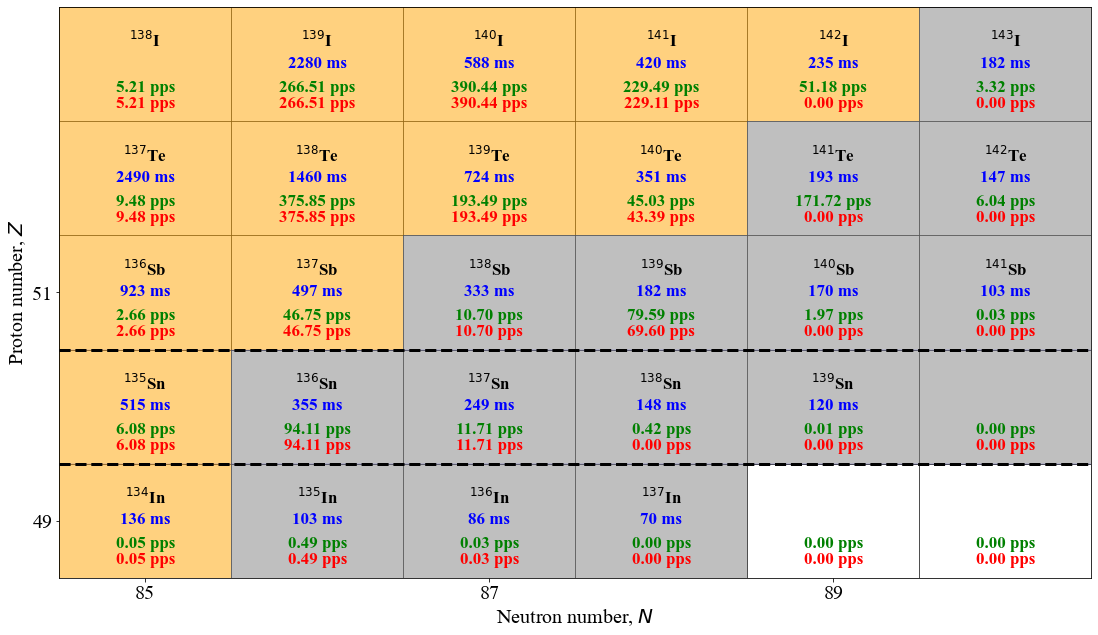

In [70]:
Zlim = [48.5,53.5]
Nlim = [84.5,90.5]
fig,axis = plt.subplots()
fig.set_size_inches(18.5,10.5)
fig.subplots_adjust(hspace=0,wspace=0)
plot_base(axis,False)
for i in range(len(frdm12)):
    if (frdm12[i]["isbound"]):
        plt.gca().add_patch(drawbox(frdm12[i]["N"],frdm12[i]["Z"],fcolor='white',ecolor='k',falpha = 0.5))

for i in range(len(ame)):
    if (ame[i]["Z"]>Zlim[0] and ame[i]["Z"]<Zlim[1] and ame[i]["N"]>Nlim[0] and ame[i]["N"]<Nlim[1]):
        if (ame[i]["is_ex_M"]):
            plt.gca().add_patch(drawbox(ame[i]["N"],ame[i]["Z"],fcolor='orange',ecolor='None', falpha = 0.5))
        else:
            plt.gca().add_patch(drawbox(ame[i]["N"],ame[i]["Z"],fcolor='grey',ecolor='None', falpha = 0.5))

for idx,i in enumerate(lise_yields):
    if (i["Z"]>Zlim[0] and i["Z"]<Zlim[1] and i["N"]>Nlim[0] and i["N"]<Nlim[1]):
#         if (("%.2f" % round(i["yield"],2))=="0.00"):
#             continue
        axis.text(i["N"], i["Z"]-0.21, "%.2f pps" % round(i["yield"],2),ha="center", va="center", color="g",fontweight='bold',fontsize=17,family = ['Times New Roman'])

for idx,i in enumerate(lise_yields_decay):
    if (i["Z"]>Zlim[0] and i["Z"]<Zlim[1] and i["N"]>Nlim[0] and i["N"]<Nlim[1]):
#         if (("%.2f" % round(i["yield"],2))=="0.00"):
#             continue
        axis.text(i["N"], i["Z"]-0.35, "%.2f pps" % round(i["yield"],2),ha="center", va="center", color="r",fontweight='bold',fontsize=17,family = ['Times New Roman'])

plot_magic(axis,'k',3)

# plot_tag(axis,"In134")
# plot_tag_NZ(axis,82,50)

for i in range(len(nubase_bminus)):
    if (nubase_bminus[i]["Z"]>Zlim[0] and nubase_bminus[i]["Z"]<Zlim[1] and nubase_bminus[i]["N"]>Nlim[0] and nubase_bminus[i]["N"]<Nlim[1]):
        plot_tag_NZ(axis,nubase_bminus[i]["N"],nubase_bminus[i]["Z"],0.2)
        if (nubase_bminus[i]["T12"]<5):
            axis.text(nubase_bminus[i]["N"], nubase_bminus[i]["Z"], "%.0f ms" % round(nubase_bminus[i]["T12"]*1000,0),ha="center", va="center", color="b",fontweight='bold',fontsize=17,family = ['Times New Roman'])

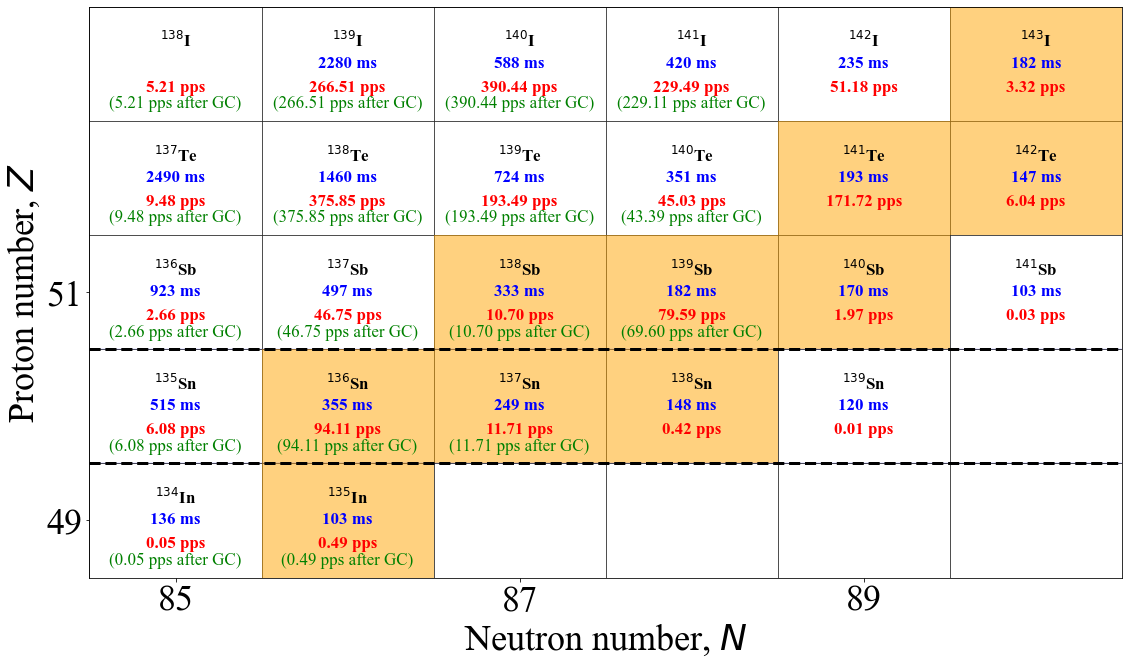

In [122]:
Zlim = [48.5,53.5]
Nlim = [84.5,90.5]
fig,axis = plt.subplots()
fig.set_size_inches(18.5,10.5)
fig.subplots_adjust(hspace=0,wspace=0)
plot_base(axis,False)
for i in range(len(frdm12)):
    if (frdm12[i]["isbound"]):
        plt.gca().add_patch(drawbox(frdm12[i]["N"],frdm12[i]["Z"],fcolor='white',ecolor='k',falpha = 0.5))

list_meas = [[49,135],[50,136],[50,137],[50,138],[51,138],[51,139],[51,140],[52,141],[52,142],[53,143]]

for i in range(len(ame)):
    if (ame[i]["Z"]>Zlim[0] and ame[i]["Z"]<Zlim[1] and ame[i]["N"]>Nlim[0] and ame[i]["N"]<Nlim[1]):
        if (ame[i]["is_ex_M"]):
            plt.gca().add_patch(drawbox(ame[i]["N"],ame[i]["Z"],fcolor='None',ecolor='None', falpha = 0.5))
        else:
            is_in_list = False
            for j in list_meas:
                if j[0]==ame[i]["Z"] and j[1]==ame[i]["N"]+ame[i]["Z"]:
                    is_in_list = True
            if is_in_list:
                plt.gca().add_patch(drawbox(ame[i]["N"],ame[i]["Z"],fcolor='orange',ecolor='None', falpha = 0.5))

for idx,i in enumerate(lise_yields):
    if (i["Z"]>Zlim[0] and i["Z"]<Zlim[1] and i["N"]>Nlim[0] and i["N"]<Nlim[1]):
        if not (i["Z"]==49 and i["N"]>86):
            if (("%.2f" % round(i["yield"],2))=="0.00"):
                continue
            axis.text(i["N"], i["Z"]-0.21, "%.2f pps" % round(i["yield"],2),ha="center", va="center", color="r",fontweight='bold',fontsize=17,family = ['Times New Roman'])

for idx,i in enumerate(lise_yields_decay):
    if (i["Z"]>Zlim[0] and i["Z"]<Zlim[1] and i["N"]>Nlim[0] and i["N"]<Nlim[1]):
        if not (i["Z"]==49 and i["N"]>86):
            if (("%.2f" % round(i["yield"],2))=="0.00"):
                continue
            axis.text(i["N"], i["Z"]-0.35, "(%.2f pps after GC)" % round(i["yield"],2),ha="center", va="center", color="green",fontweight='normal',fontsize=17,family = ['Times New Roman'])

plot_magic(axis,'k',3)

# plot_tag(axis,"In134")
# plot_tag_NZ(axis,82,50)

for i in range(len(nubase_bminus)):
    if (nubase_bminus[i]["Z"]>Zlim[0] and nubase_bminus[i]["Z"]<Zlim[1] and nubase_bminus[i]["N"]>Nlim[0] and nubase_bminus[i]["N"]<Nlim[1]):
        if not (nubase_bminus[i]["Z"]==49 and nubase_bminus[i]["N"]>86):
            plot_tag_NZ(axis,nubase_bminus[i]["N"],nubase_bminus[i]["Z"],0.2)
            if (nubase_bminus[i]["T12"]<5):
                axis.text(nubase_bminus[i]["N"], nubase_bminus[i]["Z"], "%.0f ms" % round(nubase_bminus[i]["T12"]*1000,0),ha="center", va="center", color="b",fontweight='bold',fontsize=17,family = ['Times New Roman'])

### Plot ranges

## Nov 11, 2022

- New LISE++ file


Text(0.5, 0, 'Degrader thickness (mm)')

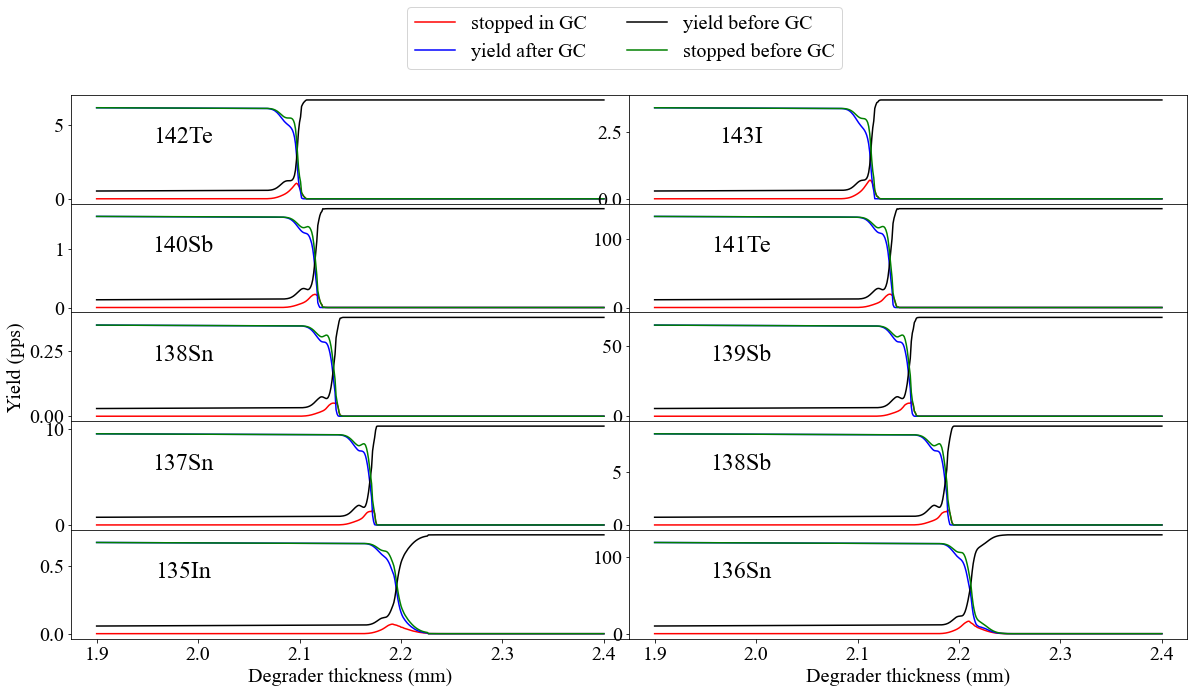

In [350]:
def get_plotdata(inputfile):
    dat = np.loadtxt(inputfile, comments='T').transpose()
    
    kkk = 0
    for i in range(len(dat)):
        if (kkk!=0):
            if len(dat[i])!=kkk:
                print("Error!")
        kkk = len(dat[i])
#     print(len(dat))
    t = dat[0]
    stop_in = dat[1]
    y_after = dat[3]
    y_before = dat[5]
    stop_before = dat[7]
    return t,stop_in,y_after,y_before,stop_before

def plotdata(inputfile,ri,optval,axis,isleg=False):
    t,stop_in,y_after,y_before,stop_before = get_plotdata(inputfile)
    if (isleg):
        axis.plot(t,stop_in,'r-',label = 'stopped in GC')
        axis.plot(t,y_after,'b-',label = 'yield after GC')
        axis.plot(t,y_before,'k-',label = 'yield before GC')
        axis.plot(t,stop_before,'g-',label = 'stopped before GC')
    else:
        axis.plot(t,stop_in,'r-')
        axis.plot(t,y_after,'b-')
        axis.plot(t,y_before,'k-')
        axis.plot(t,stop_before,'g-')
#         axis.set_xticks([0.7,0.8,0.9])
    axis.set_title(ri,x=0.2,y=0.5)
#     axis.axvline(optval,color='y',linestyle='--',linewidth=2)
#     axis.legend()

axis_font = {'fontname':'Times New Roman', 'size':'40'}
fig,axes = plt.subplots(5,2,sharex='col')
axes = axes.reshape(-1)
fig.set_size_inches(20,10)
fig.subplots_adjust(hspace=0,wspace=0)

legfont = font_manager.FontProperties(family='Times New Roman',
                               weight='normal',
                               style='normal', size=20)

font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)


dat = np.genfromtxt("misc/proposal/stopping_full_221011/stop_list.txt",dtype='str').transpose()
for i in range(1,len(dat[0])):
    if (i==1):
        plotdata("misc/proposal/stopping_full_221011/"+dat[0][i]+".txt",dat[9][i],float(dat[3][i]),axes[i-1],True)
        axes[i-1].legend(ncol=2,loc = 'upper right',bbox_to_anchor=(1.4, 1.9),prop=legfont)
    else:
        plotdata("misc/proposal/stopping_full_221011/"+dat[0][i]+".txt",dat[9][i],float(dat[3][i]),axes[i-1],False)
axes[4].set_ylabel('Yield (pps)')
axes[8].set_xlabel('Degrader thickness (mm)')
axes[9].set_xlabel('Degrader thickness (mm)')

In [336]:
def plote2(axis, Z,Nrange,mylabel,mycolor):
    dataset = []
    NN = []
    for idx,i in enumerate(theo[0]["data"]):
        if (i["Z"]==Z and i["N"]+i["Z"]<=Nrange[1] and i["N"]+i["Z"]>=Nrange[0]):
            dataset.append(i["e2"])
            NN.append(i["N"]+i["Z"])
    
    axis.plot(NN,dataset,'-',lw=4,color=mycolor,label=mylabel)
    return axis
    

Text(0, 0.5, '$\\beta _{2}$')

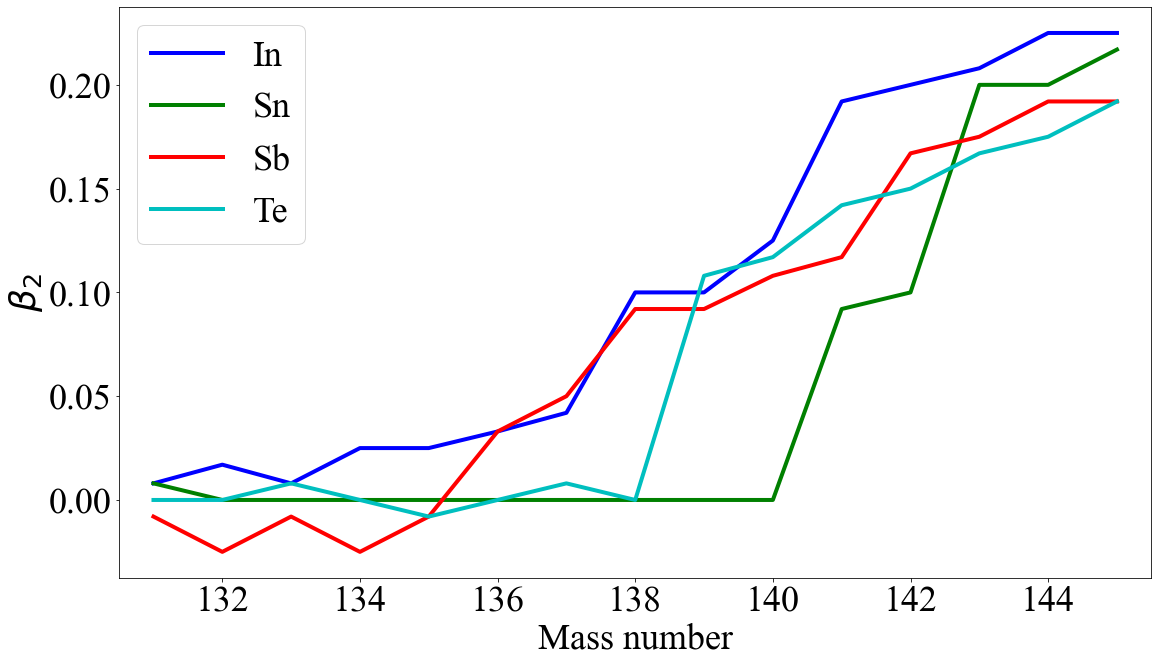

In [340]:
fig,axis = plt.subplots()
fig.set_size_inches(18.5,10.5)
fig.subplots_adjust(hspace=0,wspace=0)
colors = ['b','g','r','c','m','y','k']
axis = plote2(axis, 49,[131,145],"In",colors[0])
axis = plote2(axis, 50,[131,145],"Sn",colors[1])
axis = plote2(axis, 51,[131,145],"Sb",colors[2])
axis = plote2(axis, 52,[131,145],"Te",colors[3])
axis.legend()
axis.set_xlim([130.5,145.5])
axis.set_xlabel("Mass number")
axis.set_ylabel(r"$\beta _{2}$")

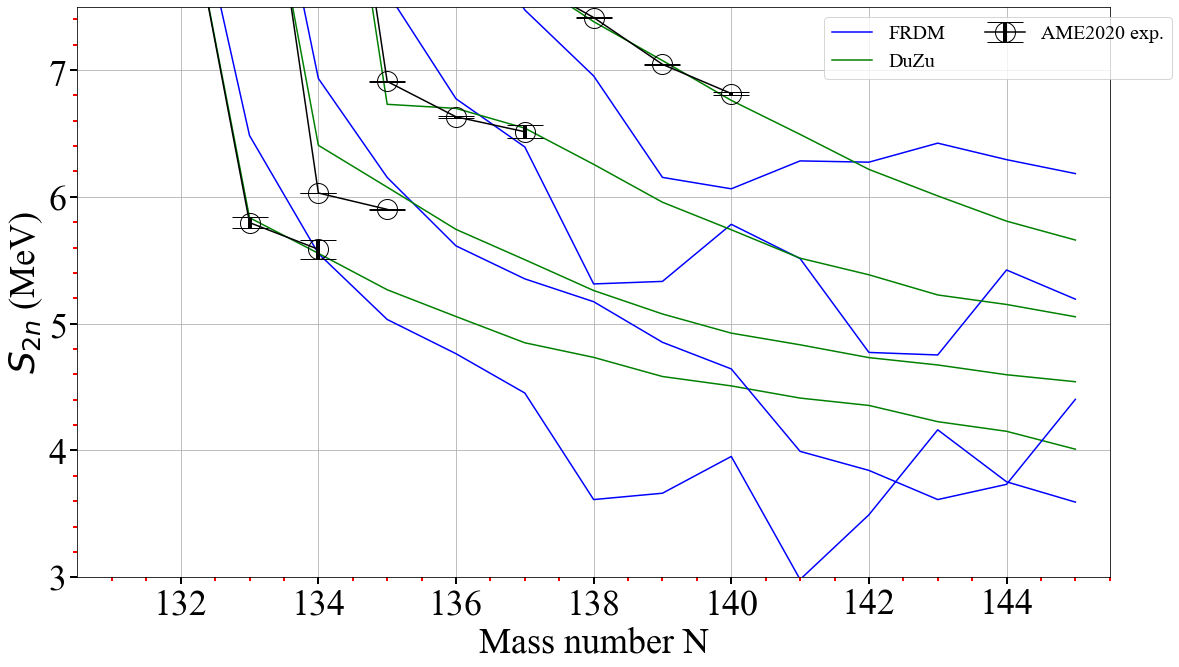

In [313]:
fig,axis = plt.subplots()
fig.set_size_inches(18.5,10.5)
fig.subplots_adjust(hspace=0,wspace=0)
axis = plotsysS2n(axis,49,[130,145],0,True)
axis = plotsysS2n(axis,50,[130,145],0,False)
axis = plotsysS2n(axis,51,[130,145],0,False)
axis = plotsysS2n(axis,52,[130,145],0,False)
# axis = plotsysS2n(axis,53,[130,145],0.,False)
# axis = plotsysS2n(axis,52,[80,95],0.,False)
# axis = plotsysS2n(axis,53,[80,95],0.,False)
# axis = plotsysS2n(axis,54,[80,95],0.,False)
# axis = plotsysS2n(axis,49,[80,95],0.,False)
# axis = plotsysS2n(axis,48,[80,95],0.,False)
axis.set_xlim([130.5,145.5])
axis.set_ylim([3.,7.5])
axis.yaxis.set_minor_locator(AutoMinorLocator())
axis.xaxis.set_minor_locator(AutoMinorLocator())
axis.tick_params(which='both', width=2)
axis.tick_params(which='major', length=7)
axis.tick_params(which='minor', length=4, color='r')
axis.grid('y')
# axis.set_xticks(np.arange(80,95,1));
# axis.set_xticklabels(np.arange(80,92,1));    


In [154]:
def get_lise_yields(infile):
    file1 = open(infile);
    count = 0
    yields = []
    while True:
        count+=1
        line1 = file1.readline()
        if (not line1):
            break
        if (line1[0]=="!"):
            continue
        
        line1 = line1[0:len(line1)-1]
        line1 = line1.split()
#         print(line1)
        yields.append({"N":int(line1[0]),"Z":int(line1[1]),"A":int(line1[0])+int(line1[1]),"yield":float(line1[2])})
    file1.close()
    return yields


In [263]:
def drawbox(N,Z,fcolor='None',ecolor='gray', falpha = 1,lw = 1,zorder=-1):
    if (zorder>0):
        rec = plt.Rectangle((N-0.5,Z-0.5),1,1,facecolor=fcolor,linewidth=lw, edgecolor=ecolor,alpha = falpha,zorder=zorder)
    else:
        rec = plt.Rectangle((N-0.5,Z-0.5),1,1,facecolor=fcolor,linewidth=lw, edgecolor=ecolor,alpha = falpha)
    #plt.text(N-0.4,Z-0.1,'$\mathregular{^{'+str(Z+N)+'}'+elements[Z]+'}$')
    return rec 


In [342]:
lise_yields = get_lise_yields("misc/proposal/stopping_full_221011/all_rate_filtered_221202.txt")
lise_yields_old = get_lise_yields("misc/proposal/yield.txt")
lise_yields_decay = get_lise_yields("misc/proposal/stopping_full_221011/GC_rate_filtered_221202.txt")
list_mass_meas = ['in135','sn136','sn137','sn138','sb138','sb139','sb140','te141','te142','i143','i144']


[Text(1, 0.001, '0.001'),
 Text(1, 0.01, '0.01'),
 Text(1, 0.1, '0.1'),
 Text(1, 1.0, '1'),
 Text(1, 10.0, '10'),
 Text(1, 100.0, '100'),
 Text(1, 1000.0, '1000')]

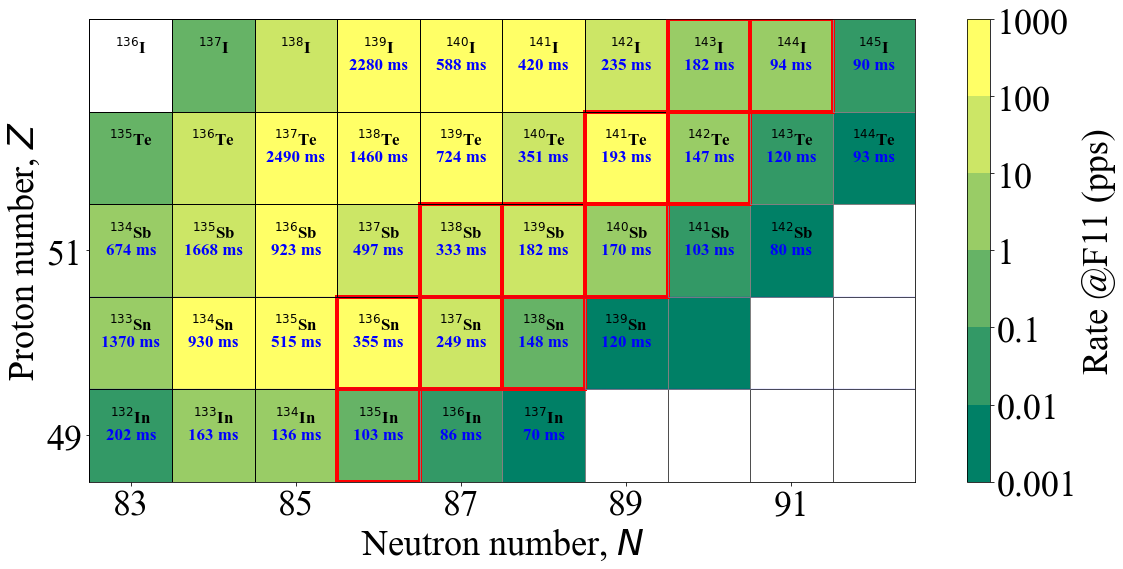

In [347]:
Zlim = [48.5,53.5]
Nlim = [82.5,92.5]
fig,axis = plt.subplots()
fig.set_size_inches(18.5,8.5)
fig.subplots_adjust(hspace=0,wspace=0)
plot_base(axis,False)
for i in range(len(frdm12)):
    if (frdm12[i]["isbound"]):
        plt.gca().add_patch(drawbox(frdm12[i]["N"],frdm12[i]["Z"],fcolor='white',ecolor='k',falpha = 0.5))

maxy=0
for idx,i in enumerate(lise_yields):
    if i["yield"]>maxy:
        maxy = i["yield"]


# cmap = (matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'cyan','yellow']).with_extremes(over='0.25', under='0.75'))
cmap = matplotlib.cm.get_cmap("summer")

# Get the colormap colors
my_cmap = cmap(np.arange(cmap.N))
# Set alpha
my_cmap[:,-1] = np.full(cmap.N,1.)
# Create new colormap
cmap = matplotlib.colors.ListedColormap(my_cmap)

cmaplist = [cmap(i) for i in range(cmap.N)]
# cmaplist[0] = (1., 1., 1., 1.0)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

bounds = [0.001,0.01, 0.1, 1, 10, 100,1000]
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)


for i in range(len(ame)):
    if (ame[i]["Z"]>Zlim[0] and ame[i]["Z"]<Zlim[1] and ame[i]["N"]>Nlim[0] and ame[i]["N"]<Nlim[1]):
#         if (ame[i]["is_ex_M"]):
#             plt.gca().add_patch(drawbox(ame[i]["N"],ame[i]["Z"],fcolor='None',ecolor='k', falpha = 1))
#         else:
#             plt.gca().add_patch(drawbox(ame[i]["N"],ame[i]["Z"],fcolor='None',ecolor='gold', falpha = 1))
        riyield = 0;
#         for jdx,j in enumerate(lise_yields_old):
        for jdx,j in enumerate(lise_yields):
            if (j["Z"]==ame[i]["Z"] and j["N"]==ame[i]["N"]):
                riyield = j["yield"]
        if (riyield>0):
            plt.gca().add_patch(drawbox(ame[i]["N"],ame[i]["Z"],fcolor=cmap(norm(riyield)),ecolor='None', falpha = 1))

for i in range(len(ame)):
    if (ame[i]["Z"]>Zlim[0] and ame[i]["Z"]<Zlim[1] and ame[i]["N"]>Nlim[0] and ame[i]["N"]<Nlim[1]):
        if (ame[i]["is_ex_M"]):
            plt.gca().add_patch(drawbox(ame[i]["N"],ame[i]["Z"],fcolor='None',ecolor='k', falpha = 1))
        else:
            plt.gca().add_patch(drawbox(ame[i]["N"],ame[i]["Z"],fcolor='None',ecolor='gray', falpha = 1))
        for jdx,j in enumerate(list_mass_meas):
#         for jdx,j in enumerate(list_mass_meas[:-1]):
            if (getZ(j)==ame[i]["Z"] and getA(j)==ame[i]["A"]):
                plt.gca().add_patch(drawbox(ame[i]["N"],ame[i]["Z"],fcolor='None',ecolor='r', falpha = 1,lw=4))
            


for i in range(len(nubase_bminus)):
    if (nubase_bminus[i]["Z"]>Zlim[0] and nubase_bminus[i]["Z"]<Zlim[1] and nubase_bminus[i]["N"]>Nlim[0] and nubase_bminus[i]["N"]<Nlim[1]):
        plot_tag_NZ(axis,nubase_bminus[i]["N"],nubase_bminus[i]["Z"],0.2)
        if (nubase_bminus[i]["T12"]<5):
            axis.text(nubase_bminus[i]["N"], nubase_bminus[i]["Z"], "%.0f ms" % round(nubase_bminus[i]["T12"]*1000,0),ha="center", va="center", color="b",fontweight='bold',fontsize=17,family = ['Times New Roman'])
            
cbar = fig.colorbar(sm, ticks=bounds, label='Rate @F11 (pps)', aspect=20, orientation='vertical', ax=axis)  # using scalarmappable to create colorbar         

cbar.ax.set_yticklabels([str(i) for i in bounds])

[Text(1, 0.001, '0.001'),
 Text(1, 0.01, '0.01'),
 Text(1, 0.1, '0.1'),
 Text(1, 1.0, '1'),
 Text(1, 10.0, '10'),
 Text(1, 100.0, '100'),
 Text(1, 1000.0, '1000')]

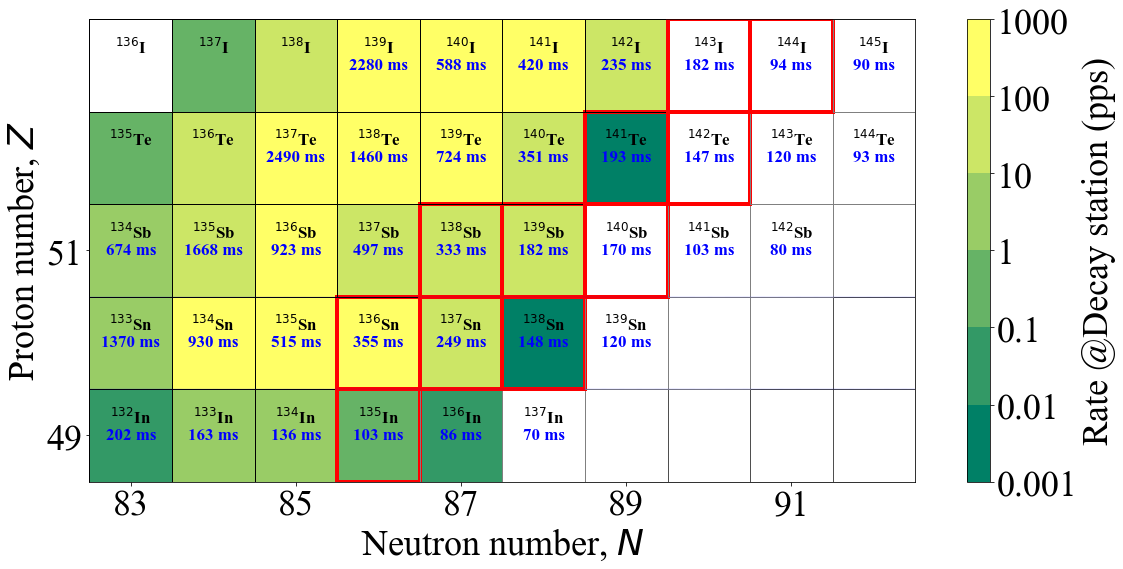

In [345]:
Zlim = [48.5,53.5]
Nlim = [82.5,92.5]
fig,axis = plt.subplots()
fig.set_size_inches(18.5,8.5)
fig.subplots_adjust(hspace=0,wspace=0)
plot_base(axis,False)
for i in range(len(frdm12)):
    if (frdm12[i]["isbound"]):
        plt.gca().add_patch(drawbox(frdm12[i]["N"],frdm12[i]["Z"],fcolor='white',ecolor='k',falpha = 0.5))

maxy=0
for idx,i in enumerate(lise_yields):
    if i["yield"]>maxy:
        maxy = i["yield"]


# cmap = (matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'cyan','yellow']).with_extremes(over='0.25', under='0.75'))
cmap = matplotlib.cm.get_cmap("summer")

# Get the colormap colors
my_cmap = cmap(np.arange(cmap.N))
# Set alpha
my_cmap[:,-1] = np.full(cmap.N,1.)
# Create new colormap
cmap = matplotlib.colors.ListedColormap(my_cmap)

cmaplist = [cmap(i) for i in range(cmap.N)]
# cmaplist[0] = (1., 1., 1., 1.0)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

bounds = [0.001,0.01, 0.1, 1, 10, 100,1000]
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)


for i in range(len(ame)):
    if (ame[i]["Z"]>Zlim[0] and ame[i]["Z"]<Zlim[1] and ame[i]["N"]>Nlim[0] and ame[i]["N"]<Nlim[1]):
#         if (ame[i]["is_ex_M"]):
#             plt.gca().add_patch(drawbox(ame[i]["N"],ame[i]["Z"],fcolor='None',ecolor='k', falpha = 1))
#         else:
#             plt.gca().add_patch(drawbox(ame[i]["N"],ame[i]["Z"],fcolor='None',ecolor='gold', falpha = 1))
        riyield = 0;
        for jdx,j in enumerate(lise_yields_decay):
            if (j["Z"]==ame[i]["Z"] and j["N"]==ame[i]["N"]):
                riyield = j["yield"]
        if (riyield>0):
            plt.gca().add_patch(drawbox(ame[i]["N"],ame[i]["Z"],fcolor=cmap(norm(riyield)),ecolor='None', falpha = 1))

for i in range(len(ame)):
    if (ame[i]["Z"]>Zlim[0] and ame[i]["Z"]<Zlim[1] and ame[i]["N"]>Nlim[0] and ame[i]["N"]<Nlim[1]):
        if (ame[i]["is_ex_M"]):
            plt.gca().add_patch(drawbox(ame[i]["N"],ame[i]["Z"],fcolor='None',ecolor='k', falpha = 1))
        else:
            plt.gca().add_patch(drawbox(ame[i]["N"],ame[i]["Z"],fcolor='None',ecolor='gray', falpha = 1))
        for jdx,j in enumerate(list_mass_meas):
            if (getZ(j)==ame[i]["Z"] and getA(j)==ame[i]["A"]):
                plt.gca().add_patch(drawbox(ame[i]["N"],ame[i]["Z"],fcolor='None',ecolor='r', falpha = 1,lw=4))
            


for i in range(len(nubase_bminus)):
    if (nubase_bminus[i]["Z"]>Zlim[0] and nubase_bminus[i]["Z"]<Zlim[1] and nubase_bminus[i]["N"]>Nlim[0] and nubase_bminus[i]["N"]<Nlim[1]):
        plot_tag_NZ(axis,nubase_bminus[i]["N"],nubase_bminus[i]["Z"],0.2)
        if (nubase_bminus[i]["T12"]<5):
            axis.text(nubase_bminus[i]["N"], nubase_bminus[i]["Z"], "%.0f ms" % round(nubase_bminus[i]["T12"]*1000,0),ha="center", va="center", color="b",fontweight='bold',fontsize=17,family = ['Times New Roman'])
            
cbar = fig.colorbar(sm, ticks=bounds, label=r'Rate @Decay station (pps)', aspect=20, orientation='vertical', ax=axis)  # using scalarmappable to create colorbar         

cbar.ax.set_yticklabels([str(i) for i in bounds])

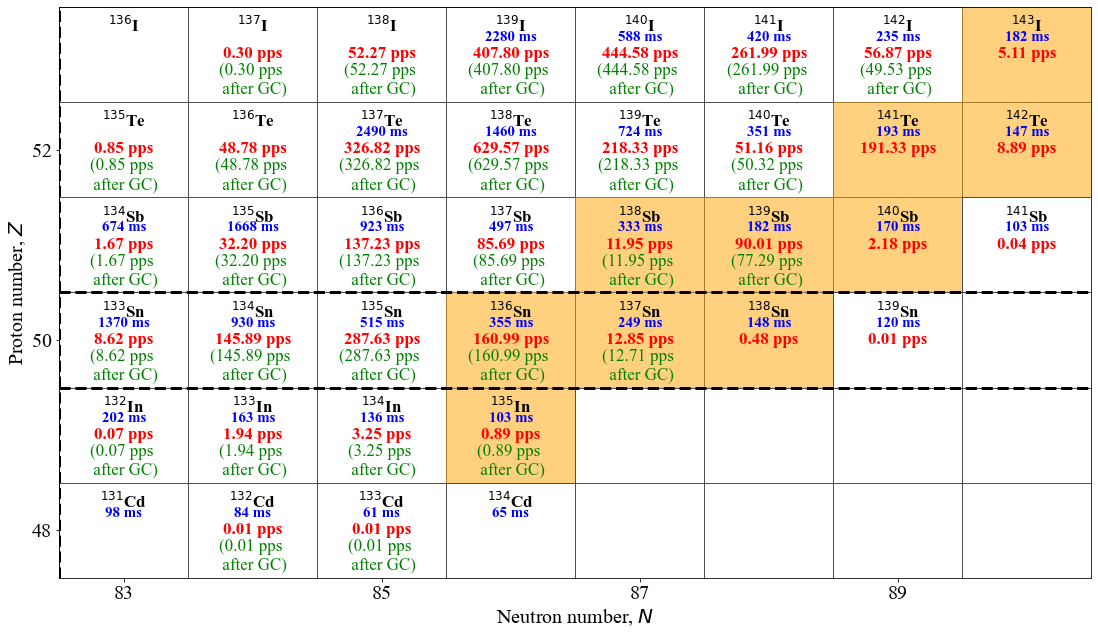

In [367]:
Zlim = [47.5,53.5]
Nlim = [82.5,90.5]
fig,axis = plt.subplots()
fig.set_size_inches(18.5,10.5)
fig.subplots_adjust(hspace=0,wspace=0)
plot_base(axis,False)
for i in range(len(frdm12)):
    if (frdm12[i]["isbound"]):
        plt.gca().add_patch(drawbox(frdm12[i]["N"],frdm12[i]["Z"],fcolor='white',ecolor='k',falpha = 0.5))

list_meas = [[49,135],[50,136],[50,137],[50,138],[51,138],[51,139],[51,140],[52,141],[52,142],[53,143]]

for i in range(len(ame)):
    if (ame[i]["Z"]>Zlim[0] and ame[i]["Z"]<Zlim[1] and ame[i]["N"]>Nlim[0] and ame[i]["N"]<Nlim[1]):
        if (ame[i]["is_ex_M"]):
            plt.gca().add_patch(drawbox(ame[i]["N"],ame[i]["Z"],fcolor='None',ecolor='None', falpha = 0.5))
        else:
            is_in_list = False
            for j in list_meas:
                if j[0]==ame[i]["Z"] and j[1]==ame[i]["N"]+ame[i]["Z"]:
                    is_in_list = True
            if is_in_list:
                plt.gca().add_patch(drawbox(ame[i]["N"],ame[i]["Z"],fcolor='orange',ecolor='None', falpha = 0.5))

for idx,i in enumerate(lise_yields):
    if (i["Z"]>Zlim[0] and i["Z"]<Zlim[1] and i["N"]>Nlim[0] and i["N"]<Nlim[1]):
        if not (i["Z"]==49 and i["N"]>86):
            if (("%.2f" % round(i["yield"],2))=="0.00"):
                continue
            axis.text(i["N"], i["Z"], "%.2f pps" % round(i["yield"],2),ha="center", va="center", color="r",fontweight='bold',fontsize=17,family = ['Times New Roman'])

for idx,i in enumerate(lise_yields_decay):
    if (i["Z"]>Zlim[0] and i["Z"]<Zlim[1] and i["N"]>Nlim[0] and i["N"]<Nlim[1]):
        if not (i["Z"]==49 and i["N"]>86):
            if (("%.2f" % round(i["yield"],2))=="0.00"):
                continue
            axis.text(i["N"], i["Z"]-0.27, "(%.2f pps \n after GC)" % round(i["yield"],2),ha="center", va="center", color="green",fontweight='normal',fontsize=17,family = ['Times New Roman'])

plot_magic(axis,'k',3)

# plot_tag(axis,"In134")
# plot_tag_NZ(axis,82,50)

for i in range(len(nubase_bminus)):
    if (nubase_bminus[i]["Z"]>Zlim[0] and nubase_bminus[i]["Z"]<Zlim[1] and nubase_bminus[i]["N"]>Nlim[0] and nubase_bminus[i]["N"]<Nlim[1]):
        if not (nubase_bminus[i]["Z"]==49 and nubase_bminus[i]["N"]>86):
            plot_tag_NZ(axis,nubase_bminus[i]["N"],nubase_bminus[i]["Z"],0.3)
            if (nubase_bminus[i]["T12"]<5):
                axis.text(nubase_bminus[i]["N"], nubase_bminus[i]["Z"]+0.18, "%.0f ms" % round(nubase_bminus[i]["T12"]*1000,0),ha="center", va="center", color="b",fontweight='bold',fontsize=15,family = ['Times New Roman'])

[[[1.]
  [0.]
  [1.]
  [0.]
  [1.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[1.]
  [0.]
  [1.]
  [0.]
  [1.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[1.]
  [0.]
  [1.]
  [0.]
  [1.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[1.]
  [0.]
  [1.]
  [0.]
  [1.]]]


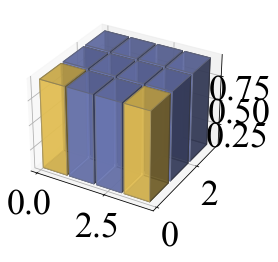

In [24]:
def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

# build up the numpy logo
n_voxels = np.zeros((4, 3, 1), dtype=bool)
n_voxels[0, 0, :] = True
n_voxels[-1, 0, :] = True
# n_voxels[1, 0, 2] = True
# n_voxels[2, 0, 1] = True
# print(n_voxels)
facecolors = np.where(n_voxels, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
filled = np.ones(n_voxels.shape)


# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# print(filled_2)
# print(edgecolors)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
# print(x)
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)
ax.set_aspect('auto')

plt.show()